# Training YOLO with Ultralytics pipeline

In [1]:
from ultralytics import YOLO
import os, sys
from tqdm.notebook import tqdm
import ultralytics
ultralytics.checks()

import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

%matplotlib inline

assert sys.version_info >= (3, 8), "Python 3.8  is required."

Ultralytics YOLOv8.0.119 🚀 Python-3.10.11 torch-2.0.0 CPU
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 349.7/926.4 GB disk)


True
True


In [2]:
# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# If using MPS on Apple Silicon
if torch.backends.mps.is_built():
    mps_device = torch.device("mps")
    model.to(mps_device)

# OPTIONAL for memory errors
# Set the value of PYTORCH_MPS_HIGH_WATERMARK_RATIO
os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] =  "0.3"

## Train

In [3]:
import wandb
wandb.init(project="MITFisheryHerring",notes="MIT Fishery robo analytics v3")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aus10powell. Use `wandb login --relogin` to force relogin


In [4]:
# Use the model
results = model.train(data='river_herring.yaml', epochs=5,dropout=0.4,device='mps')  # can also try mps

Ultralytics YOLOv8.0.119 🚀 Python-3.10.11 torch-2.0.0 MPS
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=river_herring.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, work

In [ ]:
# import gc
# gc.collect()
# torch.cuda.empty_cache() 

In [ ]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

NameError: name 'model' is not defined

In [ ]:
import cv2
# Open the video file
video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/2018 Fish Sightings/2_2018-04-13_15-14-33.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success: 
        # Run YOLOv8 inference on the frame
        results = model(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 48.8ms
Speed: 1.0ms preprocess, 48.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 52.6ms
Speed: 12.2ms preprocess, 52.6ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 42.6ms
Speed: 0.8ms preprocess, 42.6ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 46.9ms
Speed: 0.8ms preprocess, 46.9ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 45.2ms
Speed: 0.9ms preprocess, 45.2ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 50.1ms
Speed: 1.0ms preprocess, 50.1ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 44.5ms
Speed: 0.8ms preprocess, 44.5ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 46.8ms
Speed: 0.7ms preprocess, 46.8ms 

### Export Model

In [6]:
# Export the model
model.export(format='saved_model')

Ultralytics YOLOv8.0.119 🚀 Python-3.10.11 torch-2.0.0 MPS

PyTorch: starting from runs/detect/train26/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0-rc0...

ONNX: starting export with onnx 1.13.1 opset 17...
ONNX: simplifying with onnxsim 0.4.31...


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 21.2s, saved as runs/detect/train26/weights/best.onnx (11.6 MB)

TensorFlow SavedModel: running 'onnx2tf -i runs/detect/train26/weights/best.onnx -o runs/detect/train26/weights/best_saved_model -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 30.2s, saved as runs/detect/train26/weights/best_saved_model (29.2 MB)

Export complete (31.7s)
Results saved to /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train26/weights
Predict:         yolo predict task=detect model=runs/detect/train26/weights/best_saved_model imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train26/weights/best_saved_model imgsz=640 data=river_herring.yaml 
Visualize:       https://netron.app


'runs/detect/train26/weights/best_saved_model'

### Load Model

In [23]:
model_best = YOLO('./last.pt')
model_best = YOLO( "/Users/aus10powell/Downloads/RiverHerring/runs/detect/train38/weights/best.pt")


image 1/1 /Users/aus10powell/Downloads/test_new.jpg: 480x640 (no detections), 118530.9ms
Speed: 3783.9ms preprocess, 118530.9ms inference, 486.1ms postprocess per image at shape (1, 3, 640, 640)


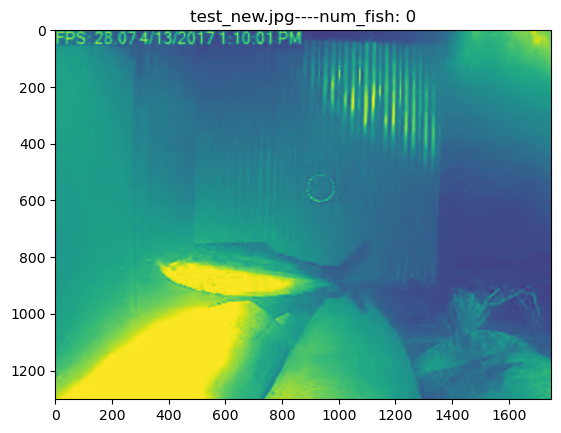

In [7]:

import matplotlib.pyplot as plt
import cv2



herring_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Johne RIver Wapping Rd Dam/vlcsnap-2016-12-20-11h40m56s911.jpg'
white_sucker_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Underwater fish Jones River/WhiteSuckerWapping (6).JPG'
small_image = '/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 (Large+annotations)/IRWA Small Jpgs/Batch 1/2_2017-04-14_19-03-04.jpg'
video_capture_test = '/Users/aus10powell/Downloads/test_new.jpg'

image = video_capture_test#herring_example

results = model_best(image)
title = image.split("/")[-1]
num_fish = len(results[0].boxes.data)

annotated_frame = results[0].plot()
gray = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2GRAY)


plt.imshow(gray)
plt.title(title + f'----num_fish: {num_fish }')
plt.show()


## Tracking

In [9]:
from ultralytics import YOLO

model = YOLO(
    "./best.pt"
)
video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4"
results = model.track(
    source=video_path,
    tracker="/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/bytetrack.yaml",
    show=True,
   #stream=True #Uncomment to use r in results as loop
)  # OPTIONAL: , tracker='custom_tracker.yaml'



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 61.2ms
video 1/1 (2/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 57.8ms
video 1/1 (3/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 (no detections)

### Experimenting

In [25]:
import cv2

from ultralytics import YOLO
import supervision as sv
import numpy as np


LINE_START = sv.Point(320, 0)
LINE_END = sv.Point(320, 480)

video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4"
model = YOLO(
    "/Users/aus10powell/Downloads/RiverHerring/runs/detect/train42/weights/best.pt"
)


def main(video_path):
    line_counter = sv.LineZone(start=LINE_START, end=LINE_END)
    line_annotator = sv.LineZoneAnnotator(thickness=2, text_thickness=1, text_scale=0.5)
    box_annotator = sv.BoxAnnotator(
        thickness=2,
        text_thickness=1,
        text_scale=0.5
    )

    #model = YOLO("yolov8l.pt")
    for result in model.track(source=video_path, show=True, stream=True, agnostic_nms=True):
        
        frame = result.orig_img
        detections = sv.Detections.from_yolov8(result)

        if result.boxes.id is not None:
            detections.tracker_id = result.boxes.id.cpu().numpy().astype(int)
        
        detections = detections[(detections.class_id != 60) & (detections.class_id != 0)]

        labels = [
            f"{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]

        frame = box_annotator.annotate(
            scene=frame, 
            detections=detections,
            labels=labels
        )

        line_counter.trigger(detections=detections)
        line_annotator.annotate(frame=frame, line_counter=line_counter)

        cv2.imshow("yolov8", frame)

        if (cv2.waitKey(30) == 27):
            break

main(video_path=video_path)


video 1/1 (1/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 4 river_herrings, 50.1ms
video 1/1 (2/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 5 river_herrings, 43.7ms
video 1/1 (3/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 4 river_herrings, 42.6ms
video 1/1 (4/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 5 river_herrings, 42.4ms
video 1/1 (5/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 6 river_herrings, 41.5ms
video 1/1 (6/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 5 river_herrings, 40.8ms
video 1/1 (7/303) /Users/aus10powell/Downloads/RiverHerri

: 